## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">  Loading the libraries

In [2]:
## importing packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

###### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> According to the world bank, the agriculture sector on average contributes 21.9% of the national GDp. Since national GDP is broadly categorised into agriculture, services and industry, we would be well within the safety bounds if we considered agriculture as the most prevalent contributor in Rural areas and the remaining 78.1% from Urban areas. Any other contributors compared to this broad spectrum would be outliers across a 40 year time period.
###### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#FF0000"> Carrying out computations on our data to obtain categorised GDP data under rural ad urban categories

In [3]:
## importing the data set source : https://datatopics.worldbank.org/world-development-indicators/
import pandas as pd

# Read CSV into a DataFrame
GDP_df = pd.read_csv(r"C:\Users\user pc\Desktop\DTE Datathon\kenya-gdp-per-capita.csv")

# display the dataframe
print(GDP_df)


    Year  GDP Per Capita ($)   Annual Growth Rate (%)  GDP Per Capita(Ksh.)
0   1960            102.0799                   147.84           15091.49242
1   1961             98.5353                    -3.47           14567.45875
2   1962            103.7967                     5.34           15345.30413
3   1963            106.5388                     2.64           15750.69619
4   1964            110.3920                     3.62           16320.35328
..   ...                 ...                      ...                   ...
58  2018           1845.7834                    10.13          272880.61790
59  2019           1970.0801                     6.73          291256.64200
60  2020           1936.2508                    -1.72          286255.31830
61  2021           2069.6611                     6.89          305978.69700
62  2022           2099.3019                     1.43          310360.79290

[63 rows x 4 columns]


In [4]:
## dropping unnamed columns


GDP_df = GDP_df.loc[:, ~GDP_df.columns.str.contains('^Unnamed')]

print(GDP_df)


    Year  GDP Per Capita ($)   Annual Growth Rate (%)  GDP Per Capita(Ksh.)
0   1960            102.0799                   147.84           15091.49242
1   1961             98.5353                    -3.47           14567.45875
2   1962            103.7967                     5.34           15345.30413
3   1963            106.5388                     2.64           15750.69619
4   1964            110.3920                     3.62           16320.35328
..   ...                 ...                      ...                   ...
58  2018           1845.7834                    10.13          272880.61790
59  2019           1970.0801                     6.73          291256.64200
60  2020           1936.2508                    -1.72          286255.31830
61  2021           2069.6611                     6.89          305978.69700
62  2022           2099.3019                     1.43          310360.79290

[63 rows x 4 columns]


In [5]:
print(GDP_df.columns)

Index(['Year', 'GDP Per Capita ($)', ' Annual Growth Rate (%)',
       'GDP Per Capita(Ksh.)'],
      dtype='object')


In [6]:
## renaming columns for easier manipulation
GDP_df.rename(columns={ 'GDP Per Capita ($)':'GDP_in_dollars'}, inplace=True)
GDP_df.rename(columns={ 'GDP Per Capita(Ksh.)':'GDP_in_KSh'}, inplace=True)
 
 

In [7]:
print(GDP_df)

    Year  GDP_in_dollars   Annual Growth Rate (%)    GDP_in_KSh
0   1960        102.0799                   147.84   15091.49242
1   1961         98.5353                    -3.47   14567.45875
2   1962        103.7967                     5.34   15345.30413
3   1963        106.5388                     2.64   15750.69619
4   1964        110.3920                     3.62   16320.35328
..   ...             ...                      ...           ...
58  2018       1845.7834                    10.13  272880.61790
59  2019       1970.0801                     6.73  291256.64200
60  2020       1936.2508                    -1.72  286255.31830
61  2021       2069.6611                     6.89  305978.69700
62  2022       2099.3019                     1.43  310360.79290

[63 rows x 4 columns]


In [8]:

converter=21.9/100

# Calculate "Rural_GDP" and "Urban_GDP" fields based on the "GDP in dollars" column
GDP_df['Rural_GDP'] = GDP_df['GDP_in_dollars'] * converter
GDP_df['Urban_GDP'] = GDP_df['GDP_in_dollars'] * (1 - converter)


# Display the DataFrame
print(GDP_df)

    Year  GDP_in_dollars   Annual Growth Rate (%)    GDP_in_KSh   Rural_GDP  \
0   1960        102.0799                   147.84   15091.49242   22.355498   
1   1961         98.5353                    -3.47   14567.45875   21.579231   
2   1962        103.7967                     5.34   15345.30413   22.731477   
3   1963        106.5388                     2.64   15750.69619   23.331997   
4   1964        110.3920                     3.62   16320.35328   24.175848   
..   ...             ...                      ...           ...         ...   
58  2018       1845.7834                    10.13  272880.61790  404.226565   
59  2019       1970.0801                     6.73  291256.64200  431.447542   
60  2020       1936.2508                    -1.72  286255.31830  424.038925   
61  2021       2069.6611                     6.89  305978.69700  453.255781   
62  2022       2099.3019                     1.43  310360.79290  459.747116   

      Urban_GDP  
0     79.724402  
1     76.956069

In [9]:
GDP_df.describe()

,Year,GDP_in_dollars,Annual Growth Rate (%),GDP_in_KSh,Rural_GDP,Urban_GDP
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1991.000000,604.821098,7.797302,89416.751188,132.455821,472.365278
std,18.330303,571.679994,20.771782,84517.170378,125.197919,446.482076
min,1960.000000,98.535300,-31.970000,14567.458750,21.579231,76.956069
25%,1975.500000,232.633850,-0.100000,34392.588385,50.946813,181.687037
50%,1991.000000,381.706000,5.530000,56431.415040,83.593614,298.112386
75%,2006.500000,769.795650,12.730000,113806.588850,168.585247,601.210403
max,2022.000000,2099.301900,147.840000,310360.792900,459.747116,1639.554784


In [10]:
## checking for missing values
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(GDP_df)

,Total,Percent
Year,0,0.0
GDP_in_dollars,0,0.0
Annual Growth Rate (%),0,0.0
GDP_in_KSh,0,0.0
Rural_GDP,0,0.0
Urban_GDP,0,0.0


#### Import the population data set and see if there is any correlation between population growth rate and GDP.

In [11]:
print(GDP_df.columns)

Index(['Year', 'GDP_in_dollars', ' Annual Growth Rate (%)', 'GDP_in_KSh',
       'Rural_GDP', 'Urban_GDP'],
      dtype='object')


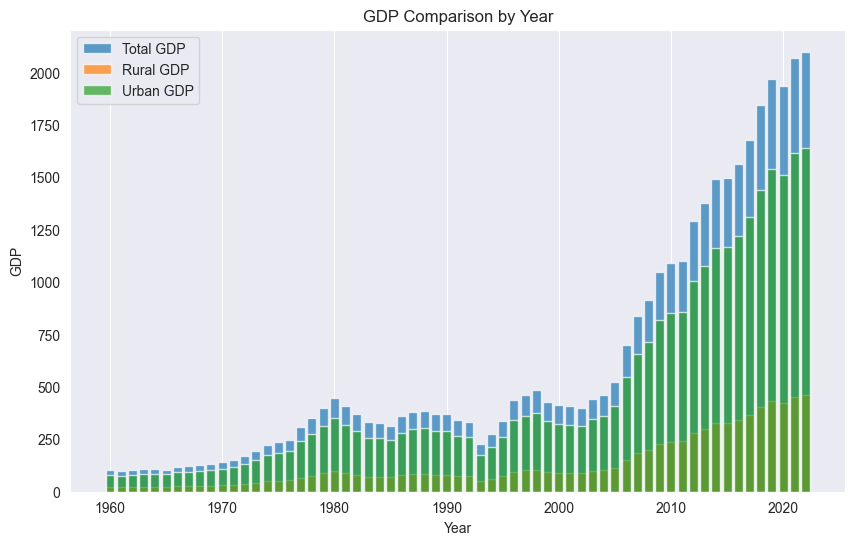

In [25]:
## data visualisations

plt.figure(figsize=(10, 6))
plt.bar(GDP_df['Year'], GDP_df['GDP_in_dollars'], label='Total GDP', alpha=0.7)
plt.bar(GDP_df['Year'], GDP_df['Rural_GDP'], label='Rural GDP', alpha=0.7)
plt.bar(GDP_df['Year'], GDP_df['Urban_GDP'], label='Urban GDP', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Comparison by Year')
plt.legend()
plt.grid(axis='y')
plt.show()


#### Could this be a reason for more people moving to urban areas?

##### visualizing the trend in urban and rural GDP's

In [12]:
print(GDP_df.columns)

Index(['Year', 'GDP_in_dollars', ' Annual Growth Rate (%)', 'GDP_in_KSh',
       'Rural_GDP', 'Urban_GDP'],
      dtype='object')


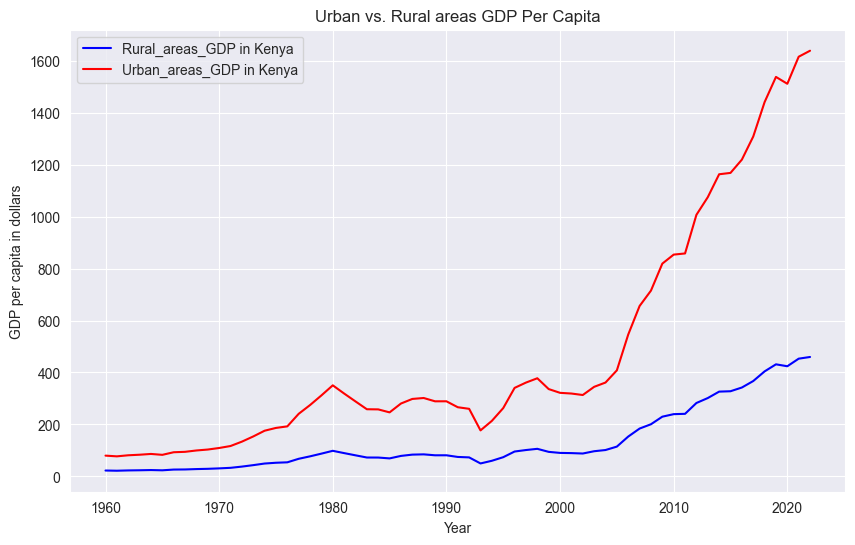

In [13]:
# Plotting
plt.figure(figsize=(10, 6)) 

# Plot urban population growth rate in blue
plt.plot(GDP_df['Year'],GDP_df['Rural_GDP'], label='Rural_areas_GDP in Kenya', color='blue')

# Plot rural population growth rate in green
plt.plot(GDP_df['Year'],GDP_df['Urban_GDP'], label='Urban_areas_GDP in Kenya', color='red')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita in dollars')
plt.title('Urban vs. Rural areas GDP Per Capita')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

##### while it was expected that urban areas will have a higher and steeper growth in GDP with increase in the number of urban areas, GDP in rural areas has also grown significantly.

In [14]:
## exporting the dataset to a csv format
GDP_df.to_csv("GDP per capita dataset.csv",index=False)